<a href="https://colab.research.google.com/github/jyj1206/BDA_9th_Pandas/blob/main/4%EC%A3%BC%EC%B0%A8_%EA%B2%B0%EC%B8%A1%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [64]:
# 데이터셋 로드
import statsmodels.api as sm

df = sm.datasets.get_rdataset("AirPassengers", package="datasets").data

# 'time' 컬럼을 datetime 형식으로 변환
df['time'] = pd.date_range(start='1949-01-01', periods=len(df), freq='MS')
df.set_index('time', inplace=True)

df.head()

,value
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [65]:
# 데이터셋 복사
df_sp = df.copy()

In [66]:
# 결측치 만들기
df.iloc[5:15, :] = np.nan
df.iloc[30:40, :] = np.nan
df.iloc[55:65, :] = np.nan
df.iloc[90:110, :] = np.nan

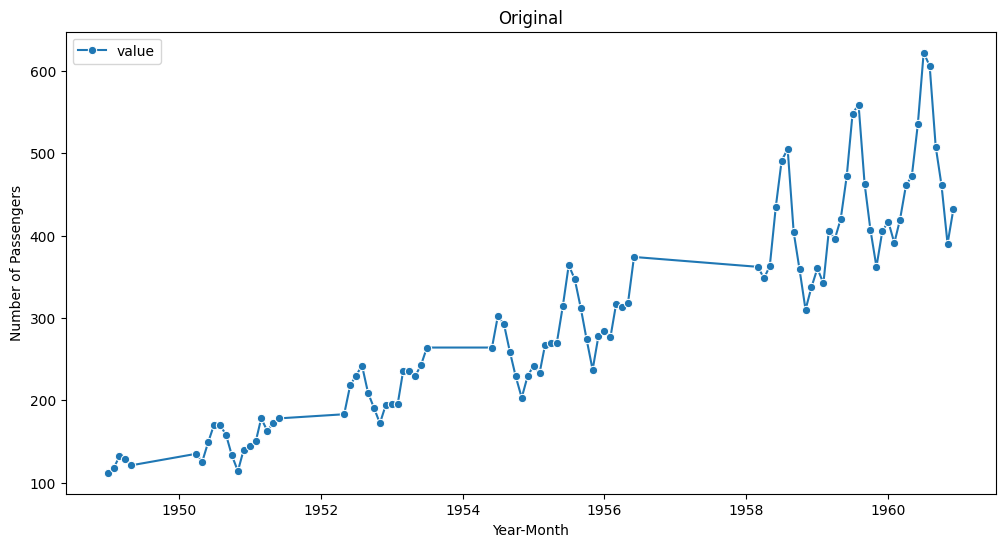

In [67]:
# 결측치 데이터 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data = df, marker='o')
plt.title('Original')
plt.xlabel('Year-Month')
plt.ylabel('Number of Passengers')
plt.show()

In [68]:
## 보간법 적용
# 1차 선형 보간법
df_linear = df.interpolate(method='linear')

# 2차 선형 보간법
df_quadratic = df.interpolate(method='quadratic')

# 평균 대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df)
df_mean = pd.DataFrame(df_mean, columns = ['value'], index = df.index)

# 0값으로 대치
df_zero = df.fillna(0)

# KNN 방법으로 대치
imputer_knn = KNNImputer(n_neighbors=5)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns = ['value'], index = df.index)

# MICE 다중대치법
imputer_mice = IterativeImputer()
df_mice = imputer_mice.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns = ['value'], index = df.index)

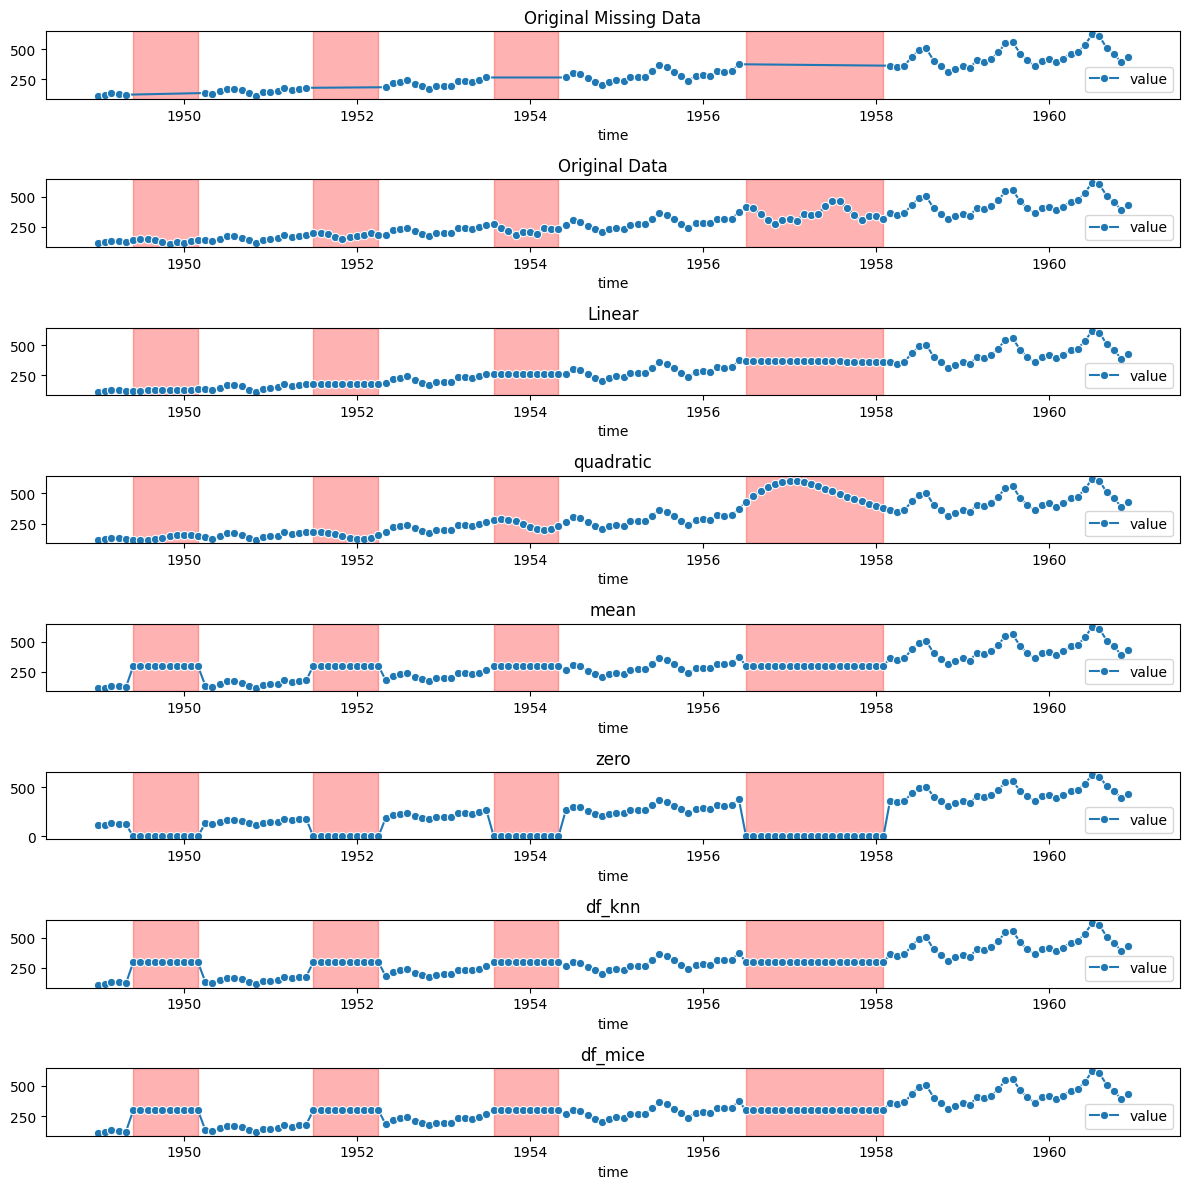

In [69]:
# 결과 시각화
fig, axs = plt.subplots(8,1,figsize=(12,12))

# 결측치 구간 범위
nan_ranges = [(5, 15), (30, 40), (55, 65), (90, 110)]

# 그래프를 그리기 전에 결측치 구간 강조
for ax in axs:
    for start, end in nan_ranges:
        ax.axvspan(df.index[start], df.index[end-1], color='red', alpha=0.3)

sns.lineplot(data= df, marker='o',ax=axs[0], legend='auto')
axs[0].set_title('Original Missing Data')

sns.lineplot(data= df_sp, marker='o',ax=axs[1], legend='auto')
axs[1].set_title('Original Data')

sns.lineplot(data= df_linear, marker='o',ax=axs[2], legend='auto')
axs[2].set_title('Linear')

sns.lineplot(data= df_quadratic, marker='o',ax=axs[3], legend='auto')
axs[3].set_title('quadratic')

sns.lineplot(data= df_mean, marker='o',ax=axs[4], legend='auto')
axs[4].set_title('mean')

sns.lineplot(data= df_zero, marker='o',ax=axs[5], legend='auto')
axs[5].set_title('zero')

sns.lineplot(data= df_knn, marker='o',ax=axs[6], legend='auto')
axs[6].set_title('df_knn')

sns.lineplot(data= df_mice, marker='o',ax=axs[7], legend='auto')
axs[7].set_title('df_mice')

plt.tight_layout()
plt.show()

- 음영처리된 부분이 설정한 결측치 영역